## Lotka Volterra Model - Wolves and Elk
by Colin Takeda

In [92]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *


In [102]:
init = State(x=1,y=1)
system = System(init=init,t0=0, t_end=200, alpha=.05, beta=0.1,delta=0.1, gamma=0.1);

In [103]:
def run_simulation(system, update_func):
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [104]:
def update_func(state, t, system):

    x = state.x
    y = state.y
    
    dx = alpha*x - beta*x*y
    dy = delta*x*y - gamma*y
    
    x += dx
    y += dy
    
    return State(x=x, y=y)

In [105]:
results = run_simulation(system, update_func);

In [106]:
def plot_results(results):

    plot(results.x, label='Wolves')
    plot(results.y, label='Elk')
    decorate(title='Lotka-Volterra Model - Wolves and Elk',
             xlabel='Time (days)',
             ylabel='Fraction of population')

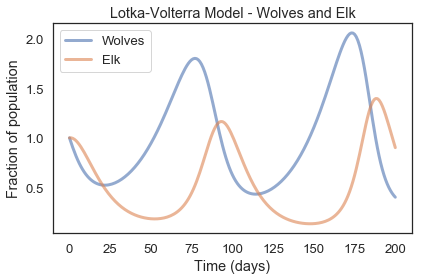

In [107]:
plot_results(results)